<a href="https://colab.research.google.com/github/Veewy/AML/blob/main/AML_3)_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Import**

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 43.6 MB/s eta 0:00:00


In [3]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00


In [5]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 14.1 MB/s eta 0:00:00


In [4]:
!pip install shap

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import os

from torch.optim.lr_scheduler import ReduceLROnPlateau
from functools import partial
from torch.utils.data import Dataset, DataLoader
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from torchmetrics import F1Score, AUROC
from torch.nn.utils.rnn import pack_sequence
from torcheval.metrics.functional import binary_auprc

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DataSet** / **DataLoader**

In [8]:
class AmlDataset(Dataset):
    def __init__(self, data, features):
        """
        @param data: pdf whose index is monotonically increases from 0
        @param features: list of features to be used in an event
        """
        self.data = data
        self.features = features

    def __getitem__(self, index):
        psr_sample = self.data.iloc[index] #retrieves row at specified index from the data.
        list_y = psr_sample["targets"]
        list_x = []

        for event in psr_sample["events"]:
          x = [event[feature] for feature in self.features] #create X
          list_x.append(x)

        #Converts the extracted features (list_x) and targets (list_y) to NumPy arrays, Returns a tuple (x, y).
        return np.array(list_x).astype(np.float32), np.array(list_y).astype(np.float32)

    def __len__(self):
        return len(self.data)

In [9]:

aml_dataset_id_downs2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/aml_dataset_id_downs2.pth")
aml_dataloader_id_downs2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/aml_dataloader_id_downs2.pth")

# train_dataset_downsampled = pd.read_parquet("/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/train_dataset_downsampled.parquet")
# train_dataset_downsampled

<ipython-input-9-017c9f8adef8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  aml_dataset_id_downs2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Col

In [10]:

aml_eval_dataset_id2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/aml_eval_dataset_id2.pth")
aml_eval_dataloader_id2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/aml_eval_dataloader_id2.pth")

<ipython-input-10-62f8dfa5fd95>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  aml_eval_dataset_id2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Col

In [11]:

aml_test_dataset_id2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/aml_test_dataset_id2.pth")
aml_test_dataloader_id2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/aml_test_dataloader_id2.pth")

<ipython-input-11-77a78003b1bc>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  aml_test_dataset_id2 = torch.load( "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Col

# Model Class

In [12]:
class AmlLstm(nn.Module):
    def __init__(
        self, cat_features, total_numerical_features, hidden_size,
        fc_input_layers, fc_output_layers, dropout_prob=0.1):
        """
        @param cat_features: A list of (n_classes, emb_size) tuples for cat features
        @param total_numerical_features:
        @param hidden_size:
        @param fc_input_layers: A list of FC sizes to be placed between input
          vector and the LSTM
        @param fc_output_layers: A list of FC sizes to be placed between the
          LSTM output to the final Sigmoid output. The last size should be 1.
        """
        super(AmlLstm, self).__init__()
        embedded_features = []
        in_fc_layers = []
        output_layers = []
        embedding_output_dim = 0

        for [n_classes, emb_size] in cat_features:
            emb_layer = nn.Embedding(n_classes, emb_size)
            embedded_features.append(emb_layer)
            embedding_output_dim += emb_size #The sum of all emb_size values determines the total embedding dimension

        prev_size = embedding_output_dim + total_numerical_features

        for current_size in fc_input_layers:
            in_fc_layers.append(nn.Dropout(p=dropout_prob))
            in_fc_layers.append(nn.Linear(prev_size, current_size, bias=True))
            prev_size = current_size

        lstm = nn.LSTM(prev_size, hidden_size, batch_first=True)
        prev_size = hidden_size

        for current_size in fc_output_layers:
            output_layers.append(nn.Dropout(p=dropout_prob))
            output_layers.append(nn.Linear(prev_size, current_size, bias=True))
            prev_size = current_size

        output_layers.append(nn.Sigmoid()) # to produce probabilities

        self.total_numerical_features = total_numerical_features
        self.embedded_features = nn.ModuleList(embedded_features)
        self.in_fc_layers = nn.ModuleList(in_fc_layers)
        self.lstm_layer = nn.ModuleList([lstm])
        self.output_layers = nn.ModuleList(output_layers)
        total_trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f'Total trainable params: {total_trainable_params}')

    def forward(self, x):
        """
        @param x: a Tensor of shape (tot_events, event_features) for a SINGLE user
            [
              [c1, c2, ..., cC, n1, n2, ..., nN],
              [...],
               ...
              [...]
            ]
            where C = len(cat_features), N = numerical_features
        @return: a Tensor of shape [batch_size, output_size]
        """
        # prepare the input vector to LSTM (categorical and numerical features)
        vector_input = []

        for cat_feat_idx, embedded_layer in enumerate(self.embedded_features):
            cat_input = x[:, cat_feat_idx].type(torch.IntTensor)
            vector_input.append(embedded_layer(cat_input))  # shape (tot_events, emb_size)

        total_cat_features = len(self.embedded_features)

        for num_feat_idx in range(self.total_numerical_features):
            num_input = x[:, total_cat_features + num_feat_idx].unsqueeze(1)  # shape (tot_events, 1)
            vector_input.append(num_input)

        vector_input_tensor = torch.cat(vector_input, dim=1)  # shape (tot_events, embedding_output_dim + total_numerical_features)

        for fc_layer in self.in_fc_layers:
            vector_input_tensor = fc_layer(vector_input_tensor)

        # pass to LSTM
        lstm_input_tensor = vector_input_tensor
        out_tensor, (h, c) = self.lstm_layer[0](lstm_input_tensor) # no previous state

        # make predict
        for output_layer in self.output_layers:
            out_tensor = output_layer(out_tensor)

        return out_tensor

# Training Loop

### Define Evaluation Metrics

In [13]:
def compute_metrics(all_preds, all_targets, threshold=0.5):

    # Convert probabilities to binary predictions
    binary_preds = (all_preds >= threshold).float()

    # Compute confusion matrix components
    TP = ((binary_preds == 1) & (all_targets == 1)).sum().item()
    TN = ((binary_preds == 0) & (all_targets == 0)).sum().item()
    FP = ((binary_preds == 1) & (all_targets == 0)).sum().item()
    FN = ((binary_preds == 0) & (all_targets == 1)).sum().item()

    # Metrics
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    try:
        auc = roc_auc_score(all_targets.cpu().numpy(), all_preds.cpu().numpy())
        #pr_auc = binary_auprc(all_preds, all_targets)
    except ValueError:
        auc = None #if AUC cannot be computed

    return precision, recall, TNR, FPR, FNR, accuracy, f1, auc, #pr_auc

### Define The Loss fn. and Optimizer

In [14]:
# Define the weighted BCE loss function
def compute_weighted_BCELoss(pred, Y, criterion, positive_weight=100):
    """
    Compute BCELoss with weights for positive samples being larger than the
    negative ones.
    """
    Y_expanded = Y[:, None]
    weights = (Y_expanded * (positive_weight - 1)) + 1
    loss = criterion(pred, Y_expanded) #compute the unweighted binary cross-entropy loss for each sample
    weighted_loss = loss * weights #applying weights
    final_loss = torch.mean(weighted_loss) # reduce loss across the batch
    return final_loss

## Define Training Utilities

In [15]:
def train_one_epoch(
        epoch, dataloader, optimizer, model, criterion, positive_weight,
        samples_in_epoch=None
    ):
    total_loss = 0
    total_samples = 0
    total_training_events = 0
    total_positives_training_Y = 0
    total_positives_training_pred = 0
    dl_iter = iter(dataloader)

    for i, (X, Y) in enumerate(dl_iter):
        optimizer.zero_grad()
        pred = model(X)
        loss = compute_weighted_BCELoss(
            pred, Y, criterion, positive_weight=positive_weight
        )
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_samples += 1
        total_training_events += len(Y)
        total_positives_training_Y += Y.sum().item()
        total_positives_training_pred += pred.sum().item()

        if total_samples % 2500 == 0:
            print(f"===> {100 * total_samples / samples_in_epoch:.2f}% completed, \
              training loss: {total_loss / total_samples:.4f}")

        if (samples_in_epoch is not None) and (i >= samples_in_epoch):
            print(f"Epoch completed after {i + 1} samples")
            break

    print(f'Epoch: {epoch}, Training loss: {total_loss / total_samples:.4f}, \
      positive stats {total_positives_training_pred / total_training_events}: \
      {total_positives_training_Y / total_training_events}'
    )


def eval_one_epoch(dataloader, model, criterion, positive_weight):
    total_eval_events = 0
    total_positives_eval_Y = 0
    total_positives_eval_pred = 0
    all_preds = []
    all_targets = []
    total_val_loss = 0

    with torch.no_grad():
        for X, Y in dataloader:
            pred = model(X)
            val_loss = compute_weighted_BCELoss(
                pred, Y, criterion, positive_weight=positive_weight
            )
            total_val_loss += val_loss.item()
            all_preds.append(pred)
            all_targets.append(Y)

    all_preds = torch.squeeze(torch.cat(all_preds), dim=1)
    all_targets = torch.squeeze(torch.cat(all_targets))
    total_eval_events += len(all_targets)
    total_positives_eval_pred += all_preds.sum().item()
    total_positives_eval_Y += all_targets.sum().item()
    avg_val_loss = total_val_loss / total_eval_events

    # Compute metrics
    precision, recall, TNR, FPR, FNR, accuracy, f1, auc = compute_metrics(all_preds, all_targets)
    positive_ratio_eval_pred = total_positives_eval_pred / total_eval_events
    positive_ratio_eval_Y = total_positives_eval_Y / total_eval_events

    print(f"Metrics:")
    print(f"Validation loss: {avg_val_loss}")
    print(f"Precision: {precision:.3f}, Recall (TPR): {recall:.3f}, TNR: {TNR:.3f}")
    print(f"FPR: {FPR:.3f}, FNR: {FNR:.3f}, Accuracy: {accuracy:.3f}, F1 Score: {f1:.3f}, AUC: {auc:.3f}")
    print(f"positive stats {positive_ratio_eval_pred }: {positive_ratio_eval_Y}")

    return avg_val_loss, precision, recall, TNR, FPR, FNR, accuracy, f1, auc, \
      positive_ratio_eval_pred, positive_ratio_eval_Y, all_preds, all_targets


def train_and_evaluate(
        epochs, dataloader_train, dataloader_eval, model, optimizer, criterion,
        positive_weight, lr_scheduler, patience=5, save_path=None, samples_in_epoch=None, trial_id=None

    ):
    """
    Train and evaluate the model for a specified number of epochs, with early stopping and intermediate saving.
    Includes gradient accumulation for memory efficiency.
    """
    log_results = []
    best_val_loss = float('inf') # Track the best validation loss
    no_improve_count = 0 # Track epochs with no improvement

    for epoch in range(epochs):
        # Train and evaluate for a complete epoch
        train_one_epoch(
            epoch, dataloader_train, optimizer, model, criterion,
            positive_weight, samples_in_epoch=samples_in_epoch
        )
        avg_val_loss, precision, recall, TNR, FPR, FNR, accuracy, f1, auc, \
        positive_ratio_eval_pred, positive_ratio_eval_Y, all_preds, \
        all_targets = eval_one_epoch(
            dataloader_eval, model, criterion, positive_weight
        )

        # Update LR scheduler
        lr_scheduler.step(avg_val_loss)
        print(f"LR: {lr_scheduler.get_last_lr()}")

        # Log metrics
        epoch_results = (
            epoch, avg_val_loss, precision, recall, TNR, FPR, FNR, accuracy, f1, auc,\
            positive_ratio_eval_pred, positive_ratio_eval_Y
        )
        log_results.append(epoch_results)

        # Save log and model every few epochs
        if (epoch % 1 == 0) and (save_path is not None):
            df_log = pd.DataFrame(
                log_results,
                columns=[
                    "epoch", "val_loss", "precision", "recall", "TNR", "FPR",
                    "FNR", "accuracy", "f1", "auc","positive_ratio_eval_pred",
                    "positive_ratio_eval_Y"
                ]
            )
            df_log_path = os.path.join(save_path, f"df_log_trial_{trial_id}_epoch_{epoch}.parquet")
            df_log.to_parquet(df_log_path)
            print(f"Saved intermediate results to {df_log_path}")

            model_path = os.path.join(save_path, f"model_trial_{trial_id}_epoch_{epoch}.bin")
            torch.save(model, model_path)
            print(f"Saved model to {model_path}")

        # Early stopping
        if avg_val_loss < best_val_loss - 1e-4:  # Improvement threshold
            best_val_loss = avg_val_loss
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            print(f"======== *** Early stopping triggered at epoch {epoch + 1} *** ========")
            break

        print("\n===================================\n")


    return pd.DataFrame(
        log_results,
        columns=[
            "epoch", "val_loss", "precision", "recall", "TNR", "FPR",
                    "FNR", "accuracy", "f1", "auc", "positive_ratio_eval_pred",
                    "positive_ratio_eval_Y"
        ]
    ), all_preds, all_targets

## Hyperparameter Tuning

note:
cat_features = [['day_of_week_encoded', xx], ['hour', xx],
['transaction_type_encoded', xx],['account_interaction_encoded', 95],
['payment_currency_encoded', xx],['received_currency_encoded', xx],
['sender_bank_location_encoded', xx],['receiver_bank_location_encoded', xx]]


- 'account'                          cat 0-43557,  ---> size ~35
- 'day_of_week_encoded':             cat   0-6  ----> root 3 size~ 2
- 'hour':                            cat   0-23 ----> size ~ 3
- 'transaction_type_encoded':        cat   0-1  ----> size ~ 1
- 'time_interval_normalized':        numerical
- 'amount_normalized':               numerical
- 'account_interaction_encoded'      cat   0-43557,  ---> size ~35
- 'payment_currency_encoded':        cat   0-12 ----> size ~ 2
- 'received_currency_encoded':       cat   0-12 ----> size ~ 2
- 'sender_bank_location_encoded':    cat   0-17 ----> size ~ 3
- 'receiver_bank_location_encoded':  cat   0-17 ----> size ~ 3

In [ ]:
"""
note:
cat_features = [['day_of_week_encoded', xx], ['hour', xx],
['transaction_type_encoded', xx],['account_interaction_encoded', 95],
['payment_currency_encoded', xx],['received_currency_encoded', xx],
['sender_bank_location_encoded', xx],['receiver_bank_location_encoded', xx]]


- 'account'                          cat 0-43557,  ---> size ~35
- 'day_of_week_encoded':             cat   0-6  ----> root 3 size~ 2
- 'hour':                            cat   0-23 ----> size ~ 3
- 'transaction_type_encoded':        cat   0-1  ----> size ~ 1
- 'time_interval_normalized':        numerical
- 'amount_normalized':               numerical
- 'account_interaction_encoded'      cat   0-43557,  ---> size ~35
- 'payment_currency_encoded':        cat   0-12 ----> size ~ 2
- 'received_currency_encoded':       cat   0-12 ----> size ~ 2
- 'sender_bank_location_encoded':    cat   0-17 ----> size ~ 3
- 'receiver_bank_location_encoded':  cat   0-17 ----> size ~ 3
"""

" \nnote:\ncat_features = [['day_of_week_encoded', xx], ['hour', xx],\n['transaction_type_encoded', xx],['account_interaction_encoded', 95],\n['payment_currency_encoded', xx],['received_currency_encoded', xx],\n['sender_bank_location_encoded', xx],['receiver_bank_location_encoded', xx]]\n\n\n- 'account'                          cat 0-43557,  ---> size ~35\n- 'day_of_week_encoded':             cat   0-6  ----> root 3 size~ 2\n- 'hour':                            cat   0-23 ----> size ~ 3\n- 'transaction_type_encoded':        cat   0-1  ----> size ~ 1\n- 'time_interval_normalized':        numerical\n- 'amount_normalized':               numerical\n- 'account_interaction_encoded'      cat   0-43557,  ---> size ~35\n- 'payment_currency_encoded':        cat   0-12 ----> size ~ 2\n- 'received_currency_encoded':       cat   0-12 ----> size ~ 2\n- 'sender_bank_location_encoded':    cat   0-17 ----> size ~ 3\n- 'receiver_bank_location_encoded':  cat   0-17 ----> size ~ 3\n"

In [16]:
def objective(trial, hp_dataloader, hp_eval_dataloader, epochs, save_path, samples_in_epoch):
    # Hyperparameter suggestions
    hidden_size = trial.suggest_int("hidden_size", 5, 90)
    positive_weight = trial.suggest_int("positive_weight", 2, 100)
    cat_features = trial.suggest_categorical(
        "cat_features", [
            [[43557, 35],[7, 2],[24, 3],[2, 1],[43557, 35],[13, 2],[13, 2],[18, 3],[18, 3]],
            [[43557, 40],[7, 3],[24, 4],[2, 1],[43557, 40],[13, 3],[13, 3],[18, 4],[18, 4]],
            [[43557, 50],[7, 4],[24, 6],[2, 2],[43557, 50],[13, 4],[13, 4],[18, 5],[18, 5]],
        ]
    )
    fc_input_layers = trial.suggest_categorical(
        "fc_input_layers",
        [
            [80, 40, 15],
            [85, 55, 35, 20, 15],
            [90, 70, 50, 30, 20, 10],
            [95, 75, 60, 50, 40, 30, 20, 10],
            [100, 80, 60, 50, 40, 40, 30, 30, 20, 10, 10],
            [100, 90, 80, 70, 60, 50, 40, 40, 30, 30, 20, 10, 10],
        ]
    )
    fc_output_layers = trial.suggest_categorical(
        "fc_output_layers",
        [
            [10, 7, 1],
            [15, 10, 5, 3, 1],
            [18, 15, 10, 8, 4, 1],
            [18, 16, 12, 7, 4, 2, 1],
            [20, 18, 16, 12, 7, 4, 2, 1],
            [25, 20, 18, 16, 12, 7, 4, 2, 1],
            [35, 25, 20, 18, 16, 12, 7, 4, 2, 1],
            [50, 45, 40, 30, 25, 20, 15, 10, 5, 1],
        ]
    )
    dropout_prob = trial.suggest_float("dropout_prob", 0.0, 0.5)

  # Define the model and other configurable training objects
    total_numerical_features = 2
    model = AmlLstm(
        cat_features, total_numerical_features, hidden_size, fc_input_layers,
        fc_output_layers, dropout_prob=dropout_prob
    )
    criterion = nn.BCELoss(weight=None, reduction='none')
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    lr_scheduler = ReduceLROnPlateau(
        optimizer, mode="min", factor=0.1, patience=3, threshold=1e-4,
        min_lr=1e-7
    )

    # Paths for checkpointing
    model_path = os.path.join(save_path, f"model_trial_{trial.number}_checkpoint.bin")
    optimizer_path = os.path.join(save_path, f"optimizer_trial_{trial.number}_checkpoint.bin")


    # Resume from checkpoint if available
    start_epoch = 0
    if os.path.exists(model_path):
        print(f"Resuming trial {trial.number} from checkpoint...")
        model.load_state_dict(torch.load(model_path))
        optimizer.load_state_dict(torch.load(optimizer_path))
        start_epoch = len([f for f in os.listdir(save_path) if f.startswith(f"df_log_trial_{trial.number}_epoch")])


    trial_id = trial.number

    # Train and evaluate

    df_log, all_preds, all_targets= train_and_evaluate(
        epochs, hp_dataloader, hp_eval_dataloader, model,
        optimizer, criterion, positive_weight, lr_scheduler,
        patience=10, samples_in_epoch=samples_in_epoch,
        save_path=save_path, trial_id=trial_id
    )

        # Save model and optimizer states after each epoch
    torch.save(model.state_dict(), model_path)
    torch.save(optimizer.state_dict(), optimizer_path)

    # Calculate average F1 score
    avg_last_3_f1 = df_log.f1.iloc[-3:].mean()
    return avg_last_3_f1

## Optuna

In [19]:
# Specify a path to the SQLite database file
storage_path = "sqlite:///optuna_study.db"

# Create a study with persistent storage
study = optuna.create_study(
    direction="maximize",           # Specify the optimization direction
    study_name="aml_study",         # Give your study a name
    storage=storage_path,           # Use SQLite for storage
    load_if_exists=True             # Reload the study if it already exists
)

[I 2025-01-13 10:55:00,225] A new study created in RDB with name: aml_study


In [ ]:
%%time
samples_in_epoch = 15000
save_path = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/exp/optuna/bestparam10" #<< revise everytime


study.optimize(
    partial(
        objective,
        hp_dataloader=aml_dataloader_id_downs2,
        hp_eval_dataloader=aml_eval_dataloader_id2,
        epochs=50,
        save_path=save_path,
        samples_in_epoch=samples_in_epoch

    ),
    n_trials=40
)

print("Best hyperparameters:", study.best_params)
print("Best avr last3 F1:", study.best_value)
#print(f"Best F1: {study.best_value}")

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [[43557, 35], [7, 2], [24, 3], [2, 1], [43557, 35], [13, 2], [13, 2], [18, 3], [18, 3]] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [[43557, 40], [7, 3], [24, 4], [2, 1], [43557, 40], [13, 3], [13, 3], [18, 4], [18, 4]] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [[43557, 50], [7, 4], [24, 6], [2, 2], [43557, 50], [13, 4], [13, 4], [18, 5], [18, 5]] which is of t

Total trainable params: 3529279
===> 16.67% completed,               training loss: 0.1903
===> 33.33% completed,               training loss: 0.2034


# Test on best model

In [ ]:
# best model
bestmodel_path = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/exp/optuna/bestparam5/trial_12/model_trial_None_epoch_23.bin"
bestmodel = torch.load(bestmodel_path)
bestmodel.eval()   # Set to evaluation mode

<ipython-input-19-567936ebb6b4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bestmodel = torch.load(bestmodel_path)


AmlLstm(
  (embedded_features): ModuleList(
    (0): Embedding(43557, 35)
    (1): Embedding(7, 2)
    (2): Embedding(24, 3)
    (3): Embedding(2, 1)
    (4): Embedding(43557, 35)
    (5-6): 2 x Embedding(13, 2)
    (7-8): 2 x Embedding(18, 3)
  )
  (in_fc_layers): ModuleList(
    (0): Dropout(p=0.005142082125976194, inplace=False)
    (1): Linear(in_features=88, out_features=80, bias=True)
    (2): Dropout(p=0.005142082125976194, inplace=False)
    (3): Linear(in_features=80, out_features=40, bias=True)
    (4): Dropout(p=0.005142082125976194, inplace=False)
    (5): Linear(in_features=40, out_features=15, bias=True)
  )
  (lstm_layer): ModuleList(
    (0): LSTM(15, 65, batch_first=True)
  )
  (output_layers): ModuleList(
    (0): Dropout(p=0.005142082125976194, inplace=False)
    (1): Linear(in_features=65, out_features=50, bias=True)
    (2): Dropout(p=0.005142082125976194, inplace=False)
    (3): Linear(in_features=50, out_features=45, bias=True)
    (4): Dropout(p=0.00514208212597

In [ ]:
def test_one_epoch(dataloader, bestmodel, criterion, positive_weight):
    total_test_events = 0
    total_positives_test_Y = 0
    total_positives_test_pred = 0
    all_preds_test = []
    all_targets_test = []
    total_val_loss_test = 0


    with torch.no_grad():
        for X, Y in dataloader:
            pred = bestmodel(X)
            val_loss = compute_weighted_BCELoss(
                pred, Y, criterion, positive_weight=positive_weight
            )
            total_val_loss_test += val_loss.item()
            all_preds_test.append(pred)
            all_targets_test.append(Y)

    all_preds_test = torch.squeeze(torch.cat(all_preds_test), dim=1)
    all_targets_test = torch.squeeze(torch.cat(all_targets_test))
    total_test_events += len(all_targets_test)
    total_positives_test_pred += all_preds_test.sum().item()
    total_positives_test_Y += all_targets_test.sum().item()
    avg_val_loss_test = total_val_loss_test / total_test_events

    # Compute metrics
    precision, recall, TNR, FPR, FNR, accuracy, f1, auc = compute_metrics(all_preds_test, all_targets_test)
    positive_ratio_test_pred = total_positives_test_pred / total_test_events
    positive_ratio_test_Y = total_positives_test_Y / total_test_events

    print(f"Metrics:")
    print(f"Validation loss: {avg_val_loss_test}")
    print(f"Precision: {precision:.3f}, Recall (TPR): {recall:.3f}, TNR: {TNR:.3f}")
    print(f"FPR: {FPR:.3f}, FNR: {FNR:.3f}, Accuracy: {accuracy:.3f}, F1 Score: {f1:.3f}, AUC: {auc:.3f}")
    print(f"positive stats {positive_ratio_test_pred }: {positive_ratio_test_Y}")

    return avg_val_loss_test, precision, recall, TNR, FPR, FNR, accuracy, f1, auc,  \
      positive_ratio_test_pred, positive_ratio_test_Y, all_preds_test, all_targets_test


In [ ]:
def test(dataloader_test, bestmodel, criterion, positive_weight):
    """
    Test the best model on the testing dataset and evaluate its performance.
    """
    avg_val_loss_test, precision, recall, TNR, FPR, FNR, accuracy, f1, auc, \
    positive_ratio_test_pred, positive_ratio_test_Y, all_preds_test, all_targets_test = test_one_epoch(
        dataloader_test, bestmodel, criterion, positive_weight
    )

    # Log final metrics
    test_results = {
        "val_loss_test": avg_val_loss_test,
        "precision": precision,
        "recall": recall,
        "TNR": TNR,
        "FPR": FPR,
        "FNR": FNR,
        "accuracy": accuracy,
        "f1": f1,
        "auc": auc,

        "positive_ratio_test_pred": positive_ratio_test_pred,
        "positive_ratio_test_Y": positive_ratio_test_Y,
    }
    print("\nFinal Testing Metrics:")
    for metric, value in test_results.items():
        print(f"{metric}: {value:.4f}")

    return test_results, all_preds_test, all_targets_test

In [ ]:
criterion = torch.nn.BCELoss()
positive_weight = 5  # Adjust based on dataset ratio
test_dataloader = aml_test_dataloader_id2  # Update test dataloader
save_path = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/exp/test/3"
os.makedirs(save_path, exist_ok=True)

In [ ]:
# Test the model for one epoch
avg_val_loss_test, precision, recall, TNR, FPR, FNR, accuracy, f1, auc, \
positive_ratio_test_pred, positive_ratio_test_Y, all_preds_test, all_targets_test = test_one_epoch(
    test_dataloader, bestmodel, criterion, positive_weight
)

# Log results
epoch_results = {
    "val_loss": avg_val_loss_test,
    "precision": precision,
    "recall": recall,
    "accuracy": accuracy,
    "f1_score": f1,
    "auc": auc,

    'positive_ratio_test_pred': positive_ratio_test_pred,
    'positive_ratio_test_Y': positive_ratio_test_Y,
    'FNR': FNR,
    'FPR': FPR,
    'TNR': TNR,
    'all_preds_test': all_preds_test.tolist(),
    'all_targets_test': all_targets_test.tolist()
}



# Convert PyTorch tensors to Python native types
epoch_results = {
    key: value.item() if isinstance(value, torch.Tensor) else value
    for key, value in epoch_results.items()
}

# Save results to a DataFrame, parquet
df_log = pd.DataFrame([epoch_results])
final_file_name = "df_log_test.parquet"
df_log.to_parquet(os.path.join(save_path, final_file_name), engine="pyarrow", index=False)

print("\n--- Test Results ---")
for key, value in epoch_results.items():
    if isinstance(value, (int, float)):
        print(f"{key.upper()}: {value:.4f}")
    elif isinstance(value, list):  # If the value is a list, print it as is
        print(f"{key.upper()}: {len(value)} items")
        # Optionally print a portion of the list to avoid excessive output:
        print(f"Sample of {key.upper()}: {value[:5]} ...")  # First 5 elements of the list
    else:
        print(f"{key.upper()}: {value}")

Metrics:
Validation loss: 0.0025689894485658254
Precision: 0.034, Recall (TPR): 0.882, TNR: 0.975
FPR: 0.025, FNR: 0.118, Accuracy: 0.975, F1 Score: 0.066, AUC: 0.979, PR_AUC: 0.080
positive stats 0.03760613066413802: 0.0009990083566338837

--- Test Results ---
VAL_LOSS: 0.0026
PRECISION: 0.0342
RECALL: 0.8820
ACCURACY: 0.9750
F1_SCORE: 0.0658
AUC: 0.9786
PR_AUC: 0.0798
POSITIVE_RATIO_TEST_PRED: 0.0376
POSITIVE_RATIO_TEST_Y: 0.0010
FNR: 0.1180
FPR: 0.0249
TNR: 0.9751
ALL_PREDS_TEST: 1900885 items
Sample of ALL_PREDS_TEST: [0.30741816759109497, 0.04051072150468826, 0.02034398727118969, 0.017444118857383728, 0.018037019297480583] ...
ALL_TARGETS_TEST: 1900885 items
Sample of ALL_TARGETS_TEST: [0.0, 0.0, 0.0, 0.0, 0.0] ...


# Result Analysis

In [ ]:
besttest = pd.read_parquet("/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/exp/test/3/df_log_test_with_pr_auc.parquet")
besttest

,val_loss,precision,recall,accuracy,f1_score,auc,pr_auc,positive_ratio_test_pred,positive_ratio_test_Y,FNR,FPR,TNR,all_preds_test,all_targets_test
0,0.002569,0.034154,0.882043,0.974964,0.065762,0.978562,0.079838,0.037606,0.000999,0.117957,0.024943,0.975057,"[0.30741816759109497, 0.04051072150468826, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
#call all_preds_test and all_targets_test
all_preds_test = besttest.all_preds_test[0]
all_targets_test = besttest.all_targets_test[0]

all_preds_test = torch.tensor(all_preds_test)
all_targets_test = torch.tensor(all_targets_test)

print(all_preds_test.shape)
print(all_targets_test.shape)

torch.Size([1900885])
torch.Size([1900885])


In [ ]:
#use scikit learn to retrieve the array of precision and recall and plot the curve

y_true = np.array(all_targets_test)
y_scores = np.array(all_preds_test)


precision, recall, thresholds = precision_recall_curve(all_targets_test, all_preds_test)

precision, recall, thresholds

(array([9.99008357e-04, 9.99008882e-04, 9.99009408e-04, ...,
        6.66666667e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.05318589e-03, 5.26592944e-04, 0.00000000e+00]),
 array([2.93680296e-05, 3.27118723e-05, 3.66882086e-05, ...,
        9.99997497e-01, 9.99998689e-01, 9.99999166e-01]))

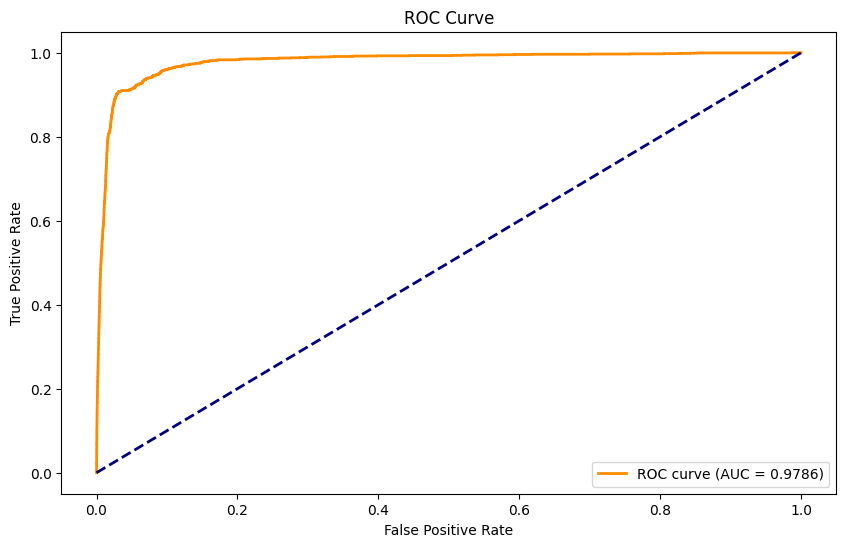

In [ ]:
#plot roc_auc
plt.rcParams['figure.figsize'] = (10, 6)
fpr, tpr, thresholds = roc_curve(all_targets_test, all_preds_test)
roc_auc = auc(fpr, tpr)

plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(all_targets_test, all_preds_test)
auc = roc_auc_score(all_targets_test, all_preds_test)
len(fpr), len(thresholds)

(375955, 375955)

In [ ]:
interval = 100000
trimmed_coordinates = []

for i, (threshold_i, fpr_i, tpr_i) in enumerate(zip(thresholds, fpr, tpr)):
    if (i % interval == 0) or (i == 1) or (i == 3000) or (i == 3500) or (i == 4000) or (i == 4150) or (i == 6000) or (i == 10000) or (i == 13000) or (i == 20000) or (i == 30000) or (i == 40000):
        trimmed_coordinates.append((threshold_i, fpr_i, tpr_i))

trimmed_coordinates

[(inf, 0.0, 0.0),
 (0.9999991655349731, 0.0, 0.000526592943654555),
 (0.9415199756622314, 0.010833676498931535, 0.6287519747235387),
 (0.8905845284461975, 0.014293417644995803, 0.7414428646656135),
 (0.6940699219703674, 0.021477251543718594, 0.8499210110584519),
 (0.47553178668022156, 0.025217142201153668, 0.8846761453396524),
 (0.2540091574192047, 0.04189499027375663, 0.909952606635071),
 (0.0774640217423439, 0.08068147948431426, 0.9452343338599263),
 (0.015698948875069618, 0.13098042850236916, 0.9715639810426541),
 (0.00819555763155222, 0.1777843543870255, 0.9831490258030542),
 (0.007573863957077265, 0.20286142183249375, 0.9847288046340179),
 (0.006984659470617771, 0.228153867379749, 0.9852553975776724),
 (0.002601074054837227, 0.4199614952400913, 0.9926276987888363),
 (0.0017315123695880175, 0.6137796697816624, 0.9957872564507636),
 (0.001173432101495564, 0.808035446285544, 0.9978936282253817)]

In [ ]:
trimmed_coordinates = trimmed_coordinates[1:]
trimmed_coordinates = trimmed_coordinates[0:8] + trimmed_coordinates[9:10] + trimmed_coordinates[11:]
trimmed_coordinates

[(0.9999991655349731, 0.0, 0.000526592943654555),
 (0.9415199756622314, 0.010833676498931535, 0.6287519747235387),
 (0.8905845284461975, 0.014293417644995803, 0.7414428646656135),
 (0.6940699219703674, 0.021477251543718594, 0.8499210110584519),
 (0.47553178668022156, 0.025217142201153668, 0.8846761453396524),
 (0.2540091574192047, 0.04189499027375663, 0.909952606635071),
 (0.0774640217423439, 0.08068147948431426, 0.9452343338599263),
 (0.015698948875069618, 0.13098042850236916, 0.9715639810426541),
 (0.007573863957077265, 0.20286142183249375, 0.9847288046340179),
 (0.002601074054837227, 0.4199614952400913, 0.9926276987888363),
 (0.0017315123695880175, 0.6137796697816624, 0.9957872564507636),
 (0.001173432101495564, 0.808035446285544, 0.9978936282253817)]

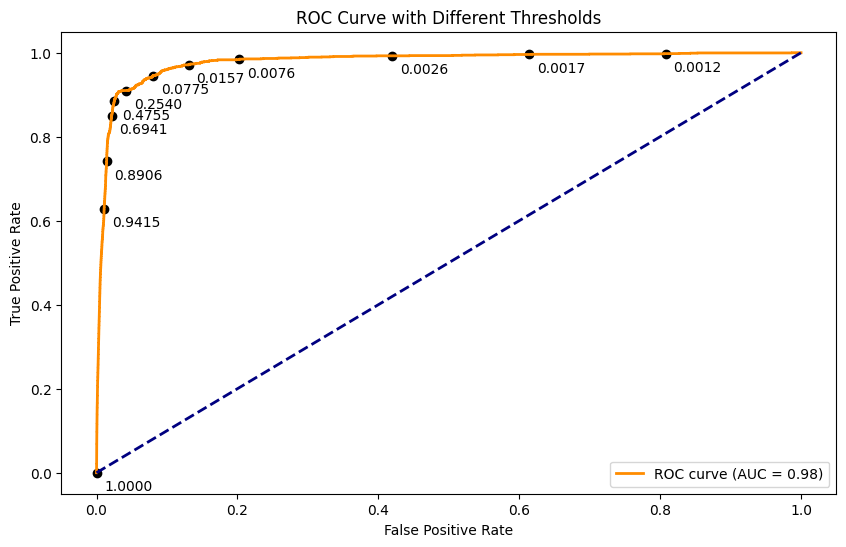

In [ ]:
#plot on ROC-AUC along with different threshold

plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')

#anotate thresholds
for i, (threshold, fpr_i, tpr_i) in enumerate(trimmed_coordinates):
    plt.annotate(f'{threshold:.4f}', (fpr_i, tpr_i), textcoords="offset points", xytext=(23, -13), ha='center')
    plt.scatter(fpr_i, tpr_i, color='black', marker='o')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Different Thresholds')
plt.legend()
plt.show()


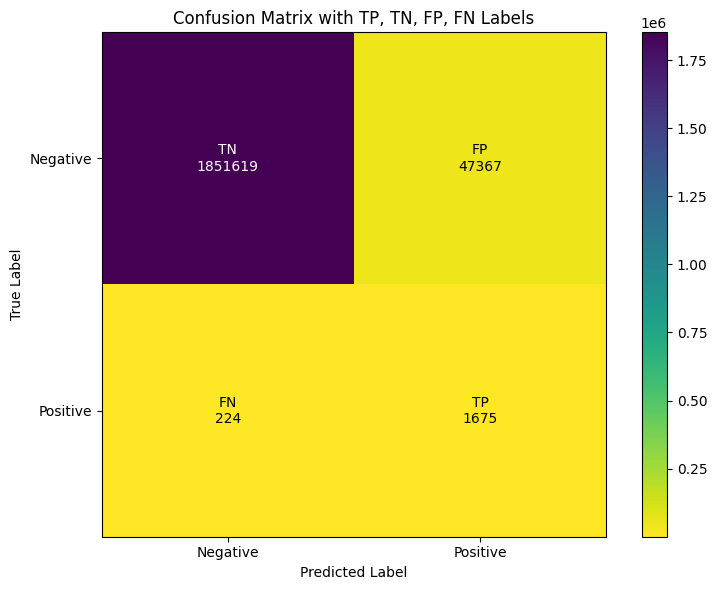

In [ ]:
#plot confusion metrix

cm = confusion_matrix(y_true, y_scores.round())

#change color
cmap = plt.cm.viridis_r
#plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#cm_display = ConfusionMatrixDisplay(cm).plot(cmap=cmap)

# Add a color bar
plt.colorbar(im, ax=ax)


#labeing
classes = ['Negative', 'Positive']  # Class names
ax.set(xticks=np.arange(len(classes)),
       yticks=np.arange(len(classes)),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted Label',
       ylabel='True Label')

# Annotate cells with values and TP, TN, FP, FN labels
labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{labels[i][j]}\n{cm[i, j]}",
                ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.title('Confusion Matrix with TP, TN, FP, FN Labels')
plt.tight_layout()
plt.show()

In [ ]:
1851619+47367+224+1675

1900885

In [ ]:
1895/1900885

0.0009969040736288624

In [ ]:
77477+85546+85546

248569

In [ ]:
684368+85546+85546

855460

# Plot val_loss vs Epoch number

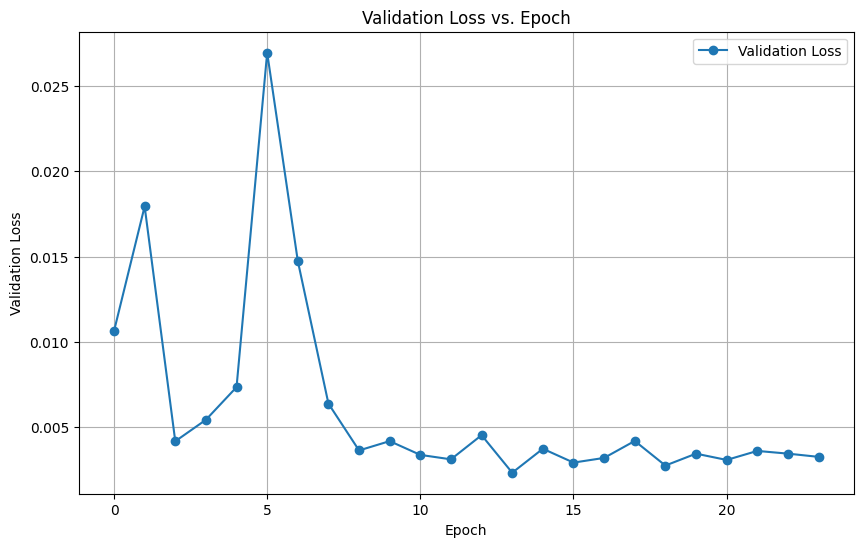

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the directory where your Parquet files are stored
log_directory = '/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/exp/optuna/bestparam5/trial_12/'

# List all Parquet files in the directory
parquet_files = [f for f in os.listdir(log_directory) if f.endswith('.parquet')]

# Initialize an empty list to store DataFrames
df_list = []

# Read all Parquet files and append them to the list
for file in parquet_files:
    file_path = os.path.join(log_directory, file)
    df = pd.read_parquet(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
full_df = pd.concat(df_list, ignore_index=True)
full_df = full_df.drop_duplicates()

# Extract the epoch and validation loss columns
epochs = full_df['epoch']  # Replace 'epoch' with the actual column name in your DataFrame
val_loss = full_df['val_loss']  # Replace 'val_loss' with the actual column name for validation loss

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_loss, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epoch')
plt.legend()
plt.grid()
plt.show()

In [ ]:
full_df

,epoch,val_loss,precision,recall,TNR,FPR,FNR,accuracy,f1,auc,positive_ratio_eval_pred,positive_ratio_eval_Y
0,0,0.010641,0.015232,0.743180,0.946839,0.053161,0.256820,0.946614,0.029851,0.900759,0.076140,0.001105
2,1,0.017947,0.042157,0.080903,0.997966,0.002034,0.919097,0.996953,0.055430,0.931273,0.331252,0.001105
5,2,0.004186,0.027028,0.467545,0.981378,0.018622,0.532455,0.980810,0.051101,0.925355,0.038583,0.001105
9,3,0.005444,0.028436,0.818909,0.969043,0.030957,0.181091,0.968877,0.054963,0.938834,0.051979,0.001105
14,4,0.007356,0.019726,0.815616,0.955155,0.044845,0.184384,0.955001,0.038520,0.952351,0.213811,0.001105
20,5,0.026949,0.007104,0.528692,0.918243,0.081757,0.471308,0.917813,0.014019,0.787033,0.445062,0.001105
27,6,0.014751,0.015361,0.782690,0.944490,0.055510,0.217310,0.944311,0.030130,0.926802,0.061095,0.001105
35,7,0.006392,0.021072,0.878645,0.954839,0.045161,0.121355,0.954755,0.041158,0.949574,0.087443,0.001105
44,8,0.003650,0.037888,0.849012,0.976146,0.023854,0.150988,0.976006,0.072538,0.959088,0.050335,0.001105
54,9,0.004195,0.029574,0.809501,0.970611,0.029389,0.190499,0.970433,0.057063,0.951880,0.039237,0.001105


<Axes: xlabel='epoch'>

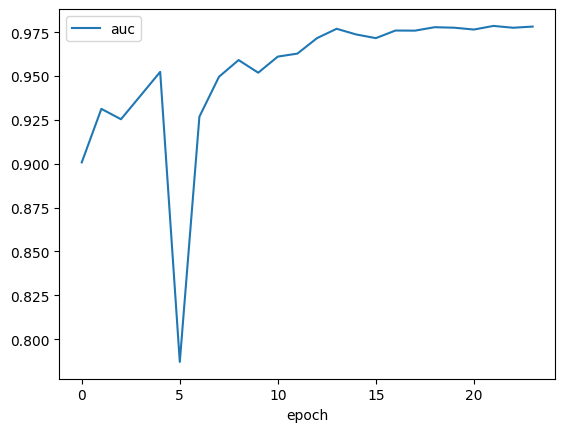

In [ ]:
full_df.plot(x="epoch", y="auc")

<Axes: xlabel='epoch'>

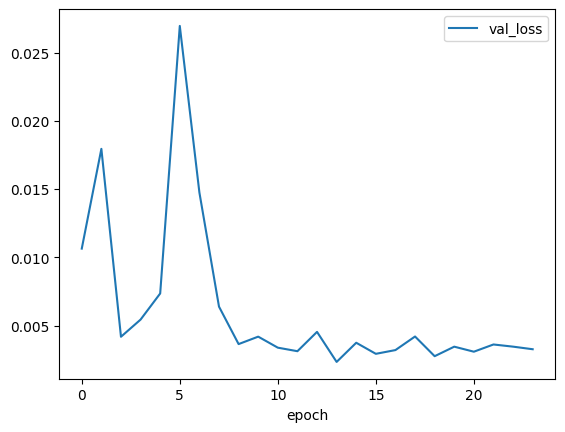

In [ ]:
full_df.plot(x="epoch", y=["val_loss"])

<Axes: xlabel='epoch'>

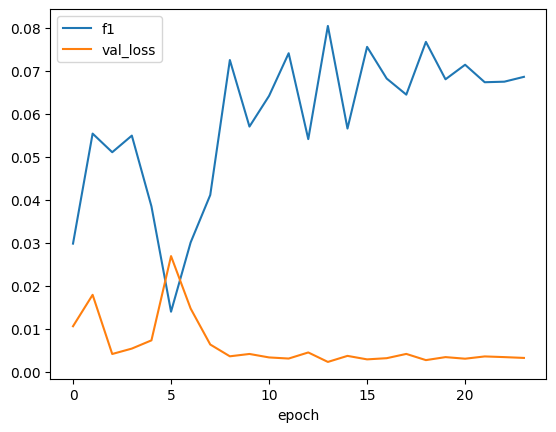

In [ ]:
#plot f1 and val_loss in the same graph
full_df.plot(x="epoch", y=["f1", "val_loss"])
